In [198]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import warnings
%matplotlib inline

In [2]:
def read_data(fpath, sheet):
    wb = pd.ExcelFile(fpath)
    all_data = pd.read_excel(wb, sheet)
    all_data.head()
    return all_data

In [26]:
def RandomForest(X_train, X_test, y_train, y_test, n_estimators, criterion, random_state):
    # use different scaling for the categorical (normalize) and continuous variables (for SVM and neural net)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    forest = RandomForestClassifier(n_estimators = n_estimators, criterion = criterion, random_state=random_state)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    acc = forest.score(X_test, y_test)
    return (forest,y_pred,acc)

In [10]:
def make_cm(y_test, y_pred, axis_labels):
    cm = confusion_matrix(y_test,y_pred,normalize= 'true')
    df_cm = pd.DataFrame(cm,index=axis_labels,columns=axis_labels)
    plt.figure()
    # ending sns line with ; supress object information line output <matplotlib ....>
    hm = sns.heatmap(df_cm, annot=True);
    return hm

In [150]:
def forest_top_n_features(forest, X_test, y_test, n, all_data):
    importances = forest.feature_importances_
    indices = np.argsort(importances)[::-1]
    ans = []
    for feat in indices[:n]:
        ans.append([all_data.columns[feat], importances[feat]])
    return (ans, indices)

In [48]:
def graph_forest_importances(forest, X_train, fsize):
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    #for f in range(X_train.shape[1]):
        #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the impurity-based feature importances of the forest
    plt.figure(figsize=fsize)
    plt.title("Feature importances")
    plt.bar(range(X_train.shape[1]), importances[indices],
            color="r", yerr=std[indices], align="center")
    plt.xticks(range(X_train.shape[1]), indices)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()

In [201]:
def make_pair_plot(data, labels, ind): 
    warnings.filterwarnings("ignore")
    plt.figure()
    temp2 = data.iloc[:,ind]
    temp2["ILD"] = labels
    sns.pairplot(temp2, hue="ILD", diag_kws={'bw': 0.3});

## Using HLA and V-gene data to predict ILD status
- HLA allele filtered > 1 count .... 45 HLA 
- V gene > 0   ... 55 V genes
- patients v patients (ILD + and ILD -)

In [199]:
#read in the data
all_data = read_data("HLA_V_ILD.xlsx","HLA_V_ILD" )
labels = all_data[all_data.columns[0]]
all_data = all_data.drop(all_data.columns[0], axis = 1)
print(all_data.shape)
all_data.head()

(49, 100)


,HLADRB1-0101,HLADRB1-0301,HLADRB1-0302,HLADRB1-0405,HLADRB1-0701,HLADRB1-0804,HLADRB1-1101,HLADRB1-1102,HLADRB1-1201,HLADRB1-1301,...,TRBV19-1,TRBV20-1,TRBV21-1,TRBV23-1,TRBV24-1,TRBV25-1,TRBV27-1,TRBV28-1,TRBV29-1,TRBV30-1
0,0,0,0,0,0,0,0,0,0,0,...,6.74,9.35,1.30,0.43,2.17,1.30,6.30,2.83,1.96,4.13
1,0,0,0,0,0,0,0,0,0,0,...,9.88,8.21,0.74,0.12,0.43,0.62,2.53,4.14,1.42,1.42
2,0,0,0,1,0,0,0,0,0,0,...,7.08,3.75,0.00,0.83,0.42,1.25,2.50,2.92,2.08,1.25
3,0,0,1,0,0,0,0,0,0,0,...,3.09,10.15,1.62,0.15,0.74,0.74,1.91,2.06,1.62,2.35
4,0,0,0,0,0,0,0,0,0,1,...,8.00,6.75,0.25,0.00,0.75,2.00,3.25,0.25,3.25,3.25


###### Using stratified K folds
Questions:
- Why does random state matter so much?
- How to interpret results? Do we just avg the accuracies of the models, take the best model ...

fold:  1
TRBV5-8 : 0.12584728857291
TRBV30-1 : 0.04502085739259057
TRBV21-1 : 0.04442920258650699
TRBV15-1 : 0.041093644054601926
TRBV5-4 : 0.04052710309923788
The accuracy of this random forest classifier is:  0.5 

fold:  2
TRBV5-8 : 0.12894313928483722
TRBV21-1 : 0.06476366319677895
TRBV20-1 : 0.0435541258638541
HLADPB1-1301 : 0.037494434754735254
TRBV5-6 : 0.036596212613253895
The accuracy of this random forest classifier is:  0.8 

fold:  3
TRBV5-8 : 0.15554278082956524
TRBV6-4 : 0.054214164107155995
HLADQA1-0102 : 0.051408476304293564
TRBV5-3 : 0.04995678982093865
TRBV2-1 : 0.03969985608063101
The accuracy of this random forest classifier is:  0.7 

fold:  4
TRBV5-6 : 0.0764059186456991
TRBV27-1 : 0.06830600492627442
HLADPB1-1301 : 0.059598538830001234
TRBV5-8 : 0.054653812926202874
TRBV6-6 : 0.053422313403320196
The accuracy of this random forest classifier is:  1.0 

fold:  5
TRBV5-8 : 0.08943487167063176
TRBV21-1 : 0.05879409476598699
HLADQA1-0102 : 0.05385526982892133
TRBV13-

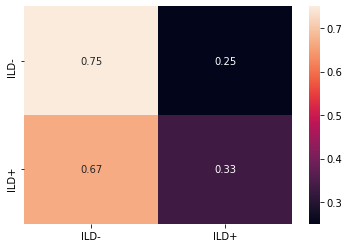

<Figure size 432x288 with 0 Axes>

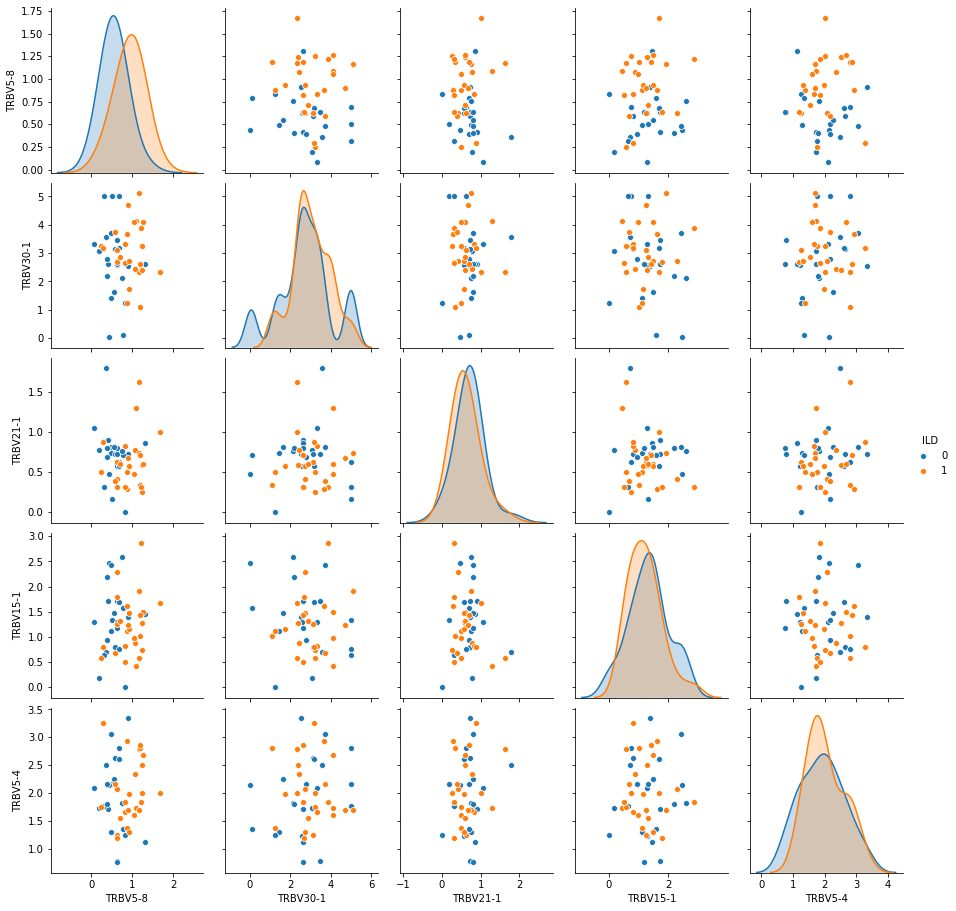

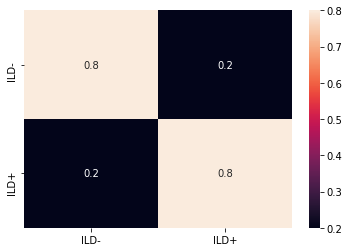

<Figure size 432x288 with 0 Axes>

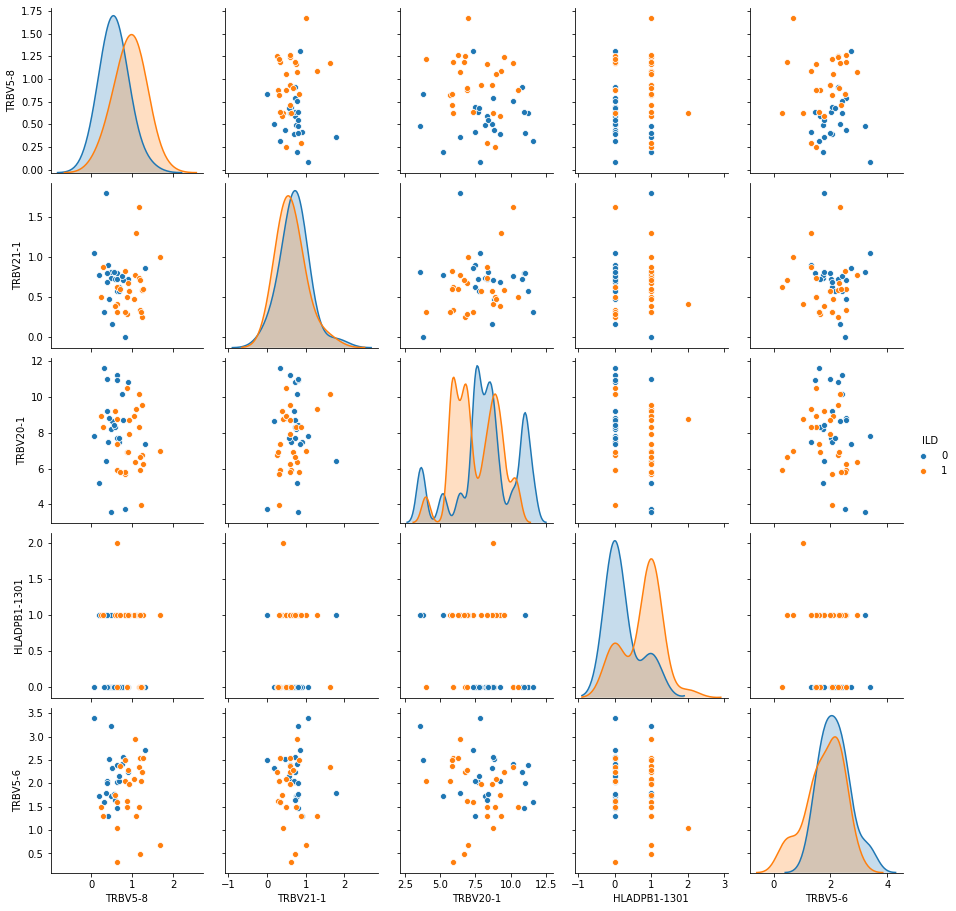

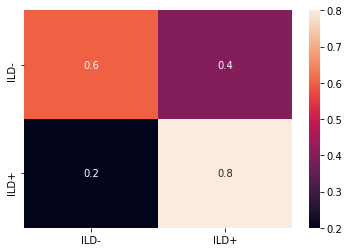

<Figure size 432x288 with 0 Axes>

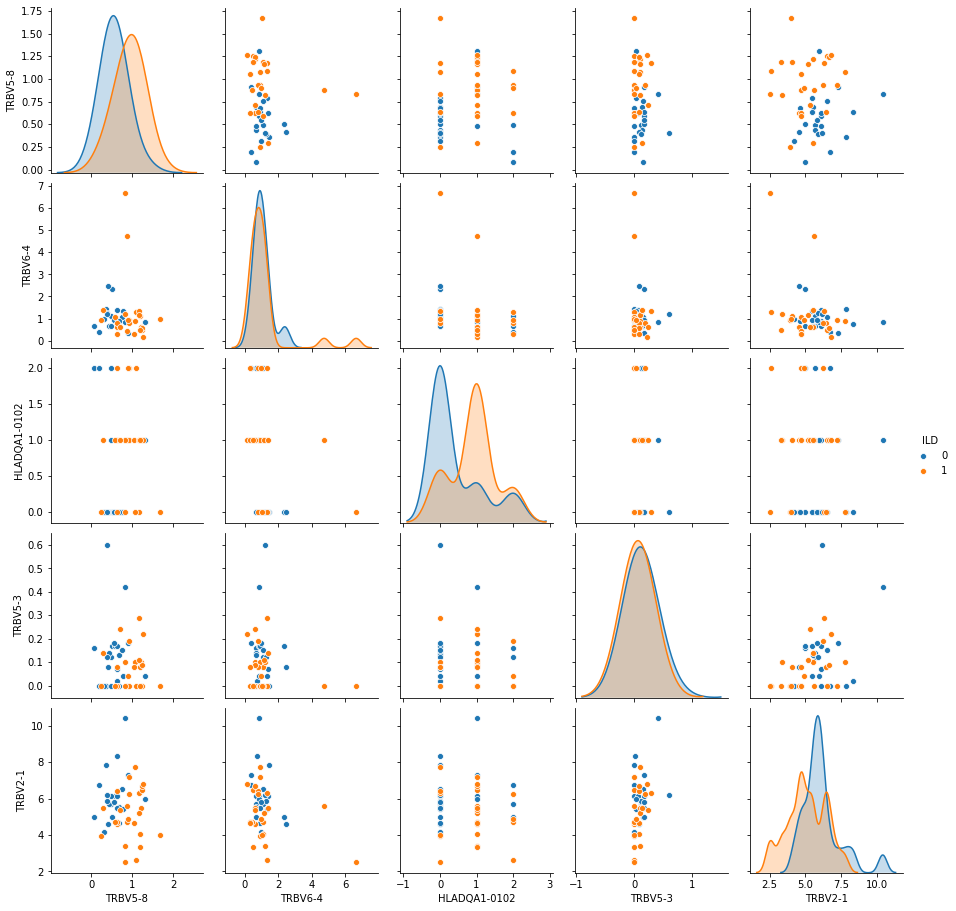

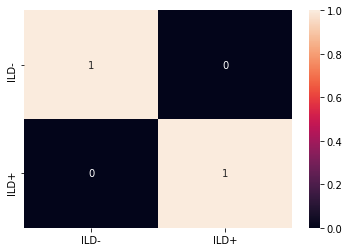

<Figure size 432x288 with 0 Axes>

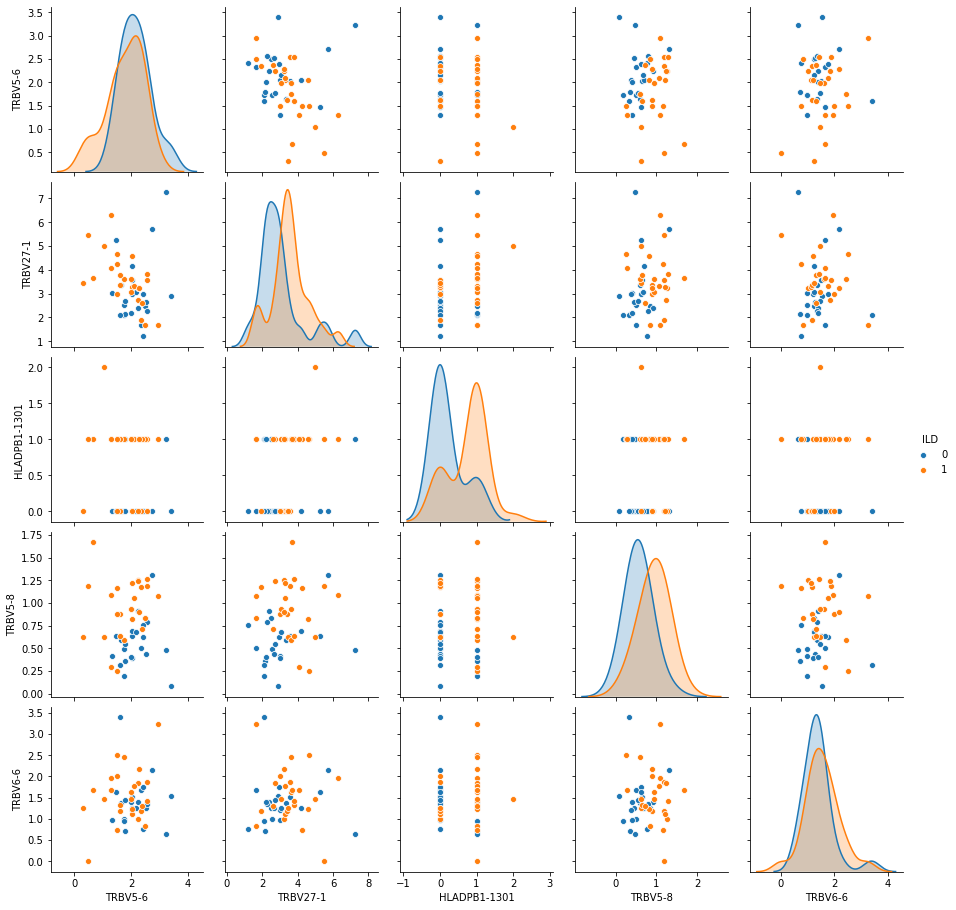

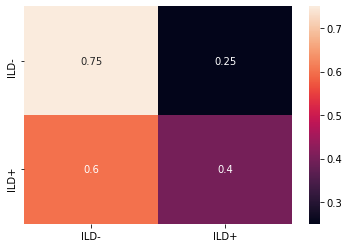

<Figure size 432x288 with 0 Axes>

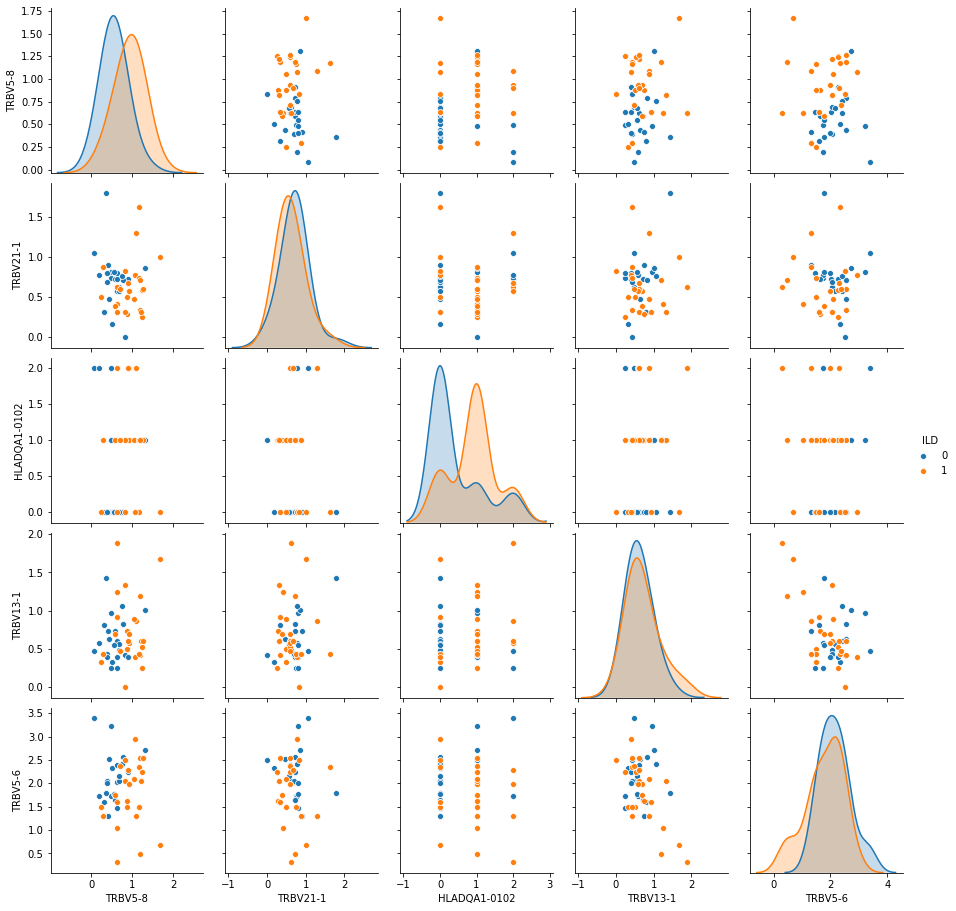

In [200]:
splits = 5
skf = StratifiedKFold(n_splits= splits, shuffle = True, random_state = 1)
all_data_np = all_data.to_numpy()
avg_accuracy = 0
count = 1
for train_index, test_index in skf.split(all_data_np, labels):
    #print("TRAIN:", train_index_strat, "\nTEST:", test_index_strat)
    print("fold: ", count)
    count += 1
    X_train, X_test = all_data_np[train_index], all_data_np[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    forest, y_pred, acc = RandomForest(X_train,X_test, y_train, y_test, n_estimators = 30, criterion = 'entropy', random_state= 2)
    cm = make_cm(y_test,y_pred, ["ILD-", "ILD+"])
   
    top_features, indices = forest_top_n_features(forest, X_test, y_test, 5, all_data)
    avg_accuracy += acc
    for a,b in top_features:
        print(a, ":", b)
    print("The accuracy of this random forest classifier is: ", acc, "\n")
    make_pair_plot(all_data, labels, indices[:5])
print("Overall accuracy is: {}".format(avg_accuracy/splits))


###### using train_test split

labels : 0.10529315392065883
TRBV24-1 : 0.06671022619971087
TRBV14-1 : 0.051498898126511
TRBV4-3 : 0.04871755261052248
HLADPB1-1301 : 0.042389917831458665
The accuracy of this random forest classifier is:  0.8


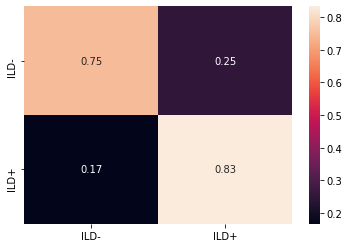

In [135]:
X_train, X_test, y_train, y_test = train_test_split(all_data, labels, test_size = 0.2, random_state=13)
forest, y_pred, acc = RandomForest(X_train, X_test, y_train, y_test, n_estimators = 10, criterion = 'entropy', random_state=42)
cm = make_cm(y_test,y_pred, ["ILD-", "ILD+"])
top_features, indices= forest_top_n_features(forest, X_test, y_test, 5, all_data)
for a,b in top_features:
    print(a, ":", b)
print("The accuracy of this random forest classifier is: ", acc)

(49, 5)


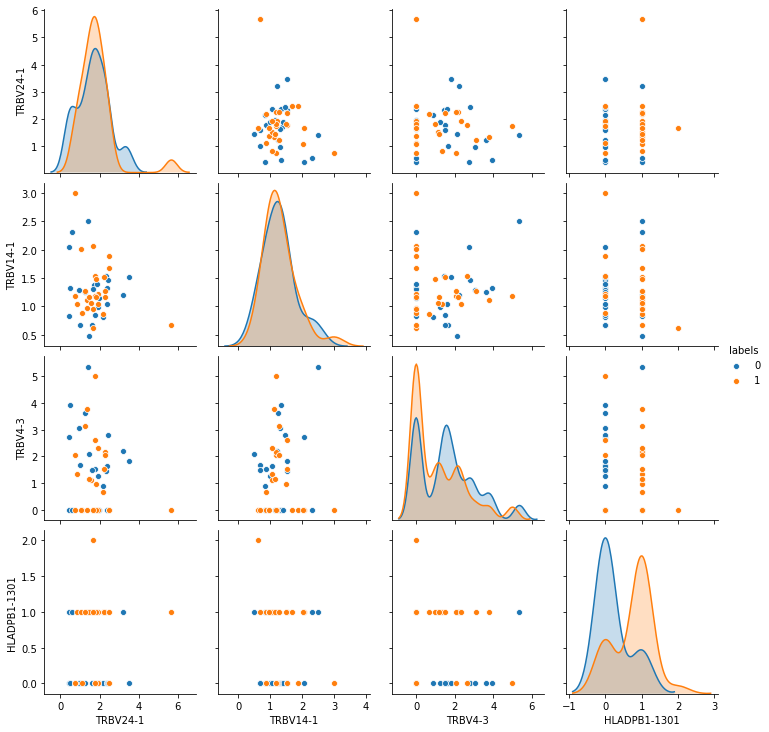

In [136]:
make_pair_plot(all_data, labels, 5)

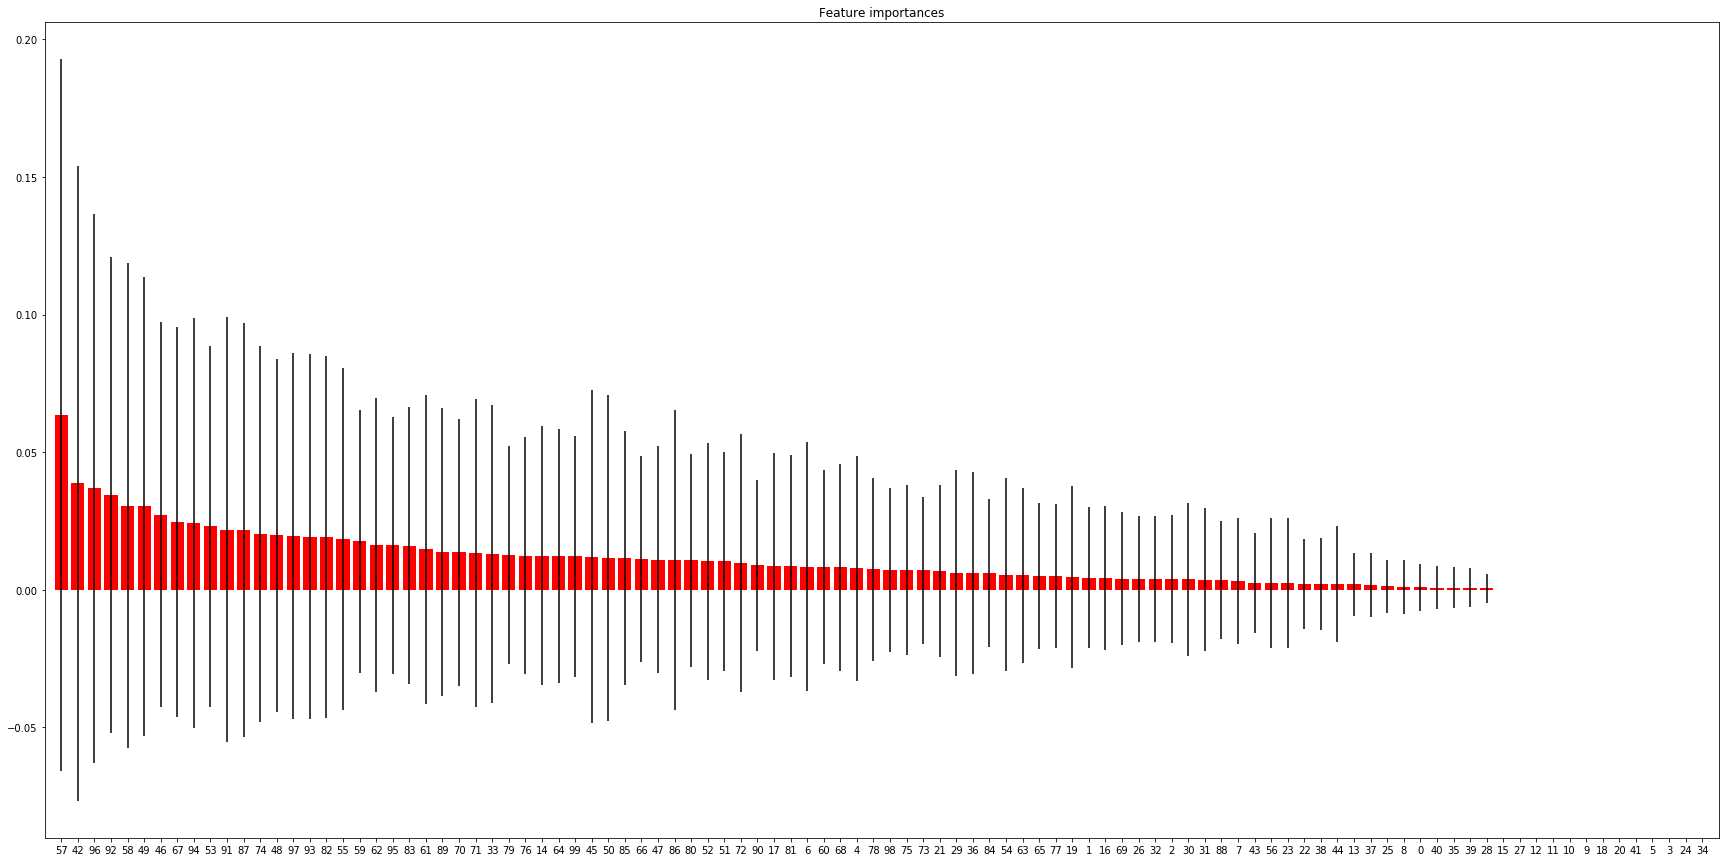

In [60]:
graph_forest_importances(forest, X_train, (30,15))

## Just the HLA to predict ILD

In [69]:
all_data = read_data("HLA_V_ILD.xlsx","Sheet1" )
labels = all_data[all_data.columns[0]]
HLA_data = all_data.drop(all_data.columns[0], axis = 1)
print(HLA_data.shape)
HLA_data.head()

(49, 45)


,HLADRB1-0101,HLADRB1-0301,HLADRB1-0302,HLADRB1-0405,HLADRB1-0701,HLADRB1-0804,HLADRB1-1101,HLADRB1-1102,HLADRB1-1201,HLADRB1-1301,...,HLADPA1-0301,HLADPB1-0101,HLADPB1-0201,HLADPB1-0301,HLADPB1-0401,HLADPB1-0402,HLADPB1-1101,HLADPB1-1301,HLADPB1-1701,HLADPB1-1801
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,2,0,0,0,0,0,0,0,0


HLADPB1-1101 : 0.12402815173887881
HLADQA1-0101 : 0.0891107852512788
HLADPA1-0103 : 0.05803169114694772
HLADQB1-0503 : 0.054457223196841806
HLADQA1-0401 : 0.035191835015327015
The accuracy of this random forest classifier is:  0.6


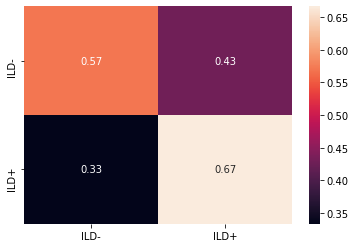

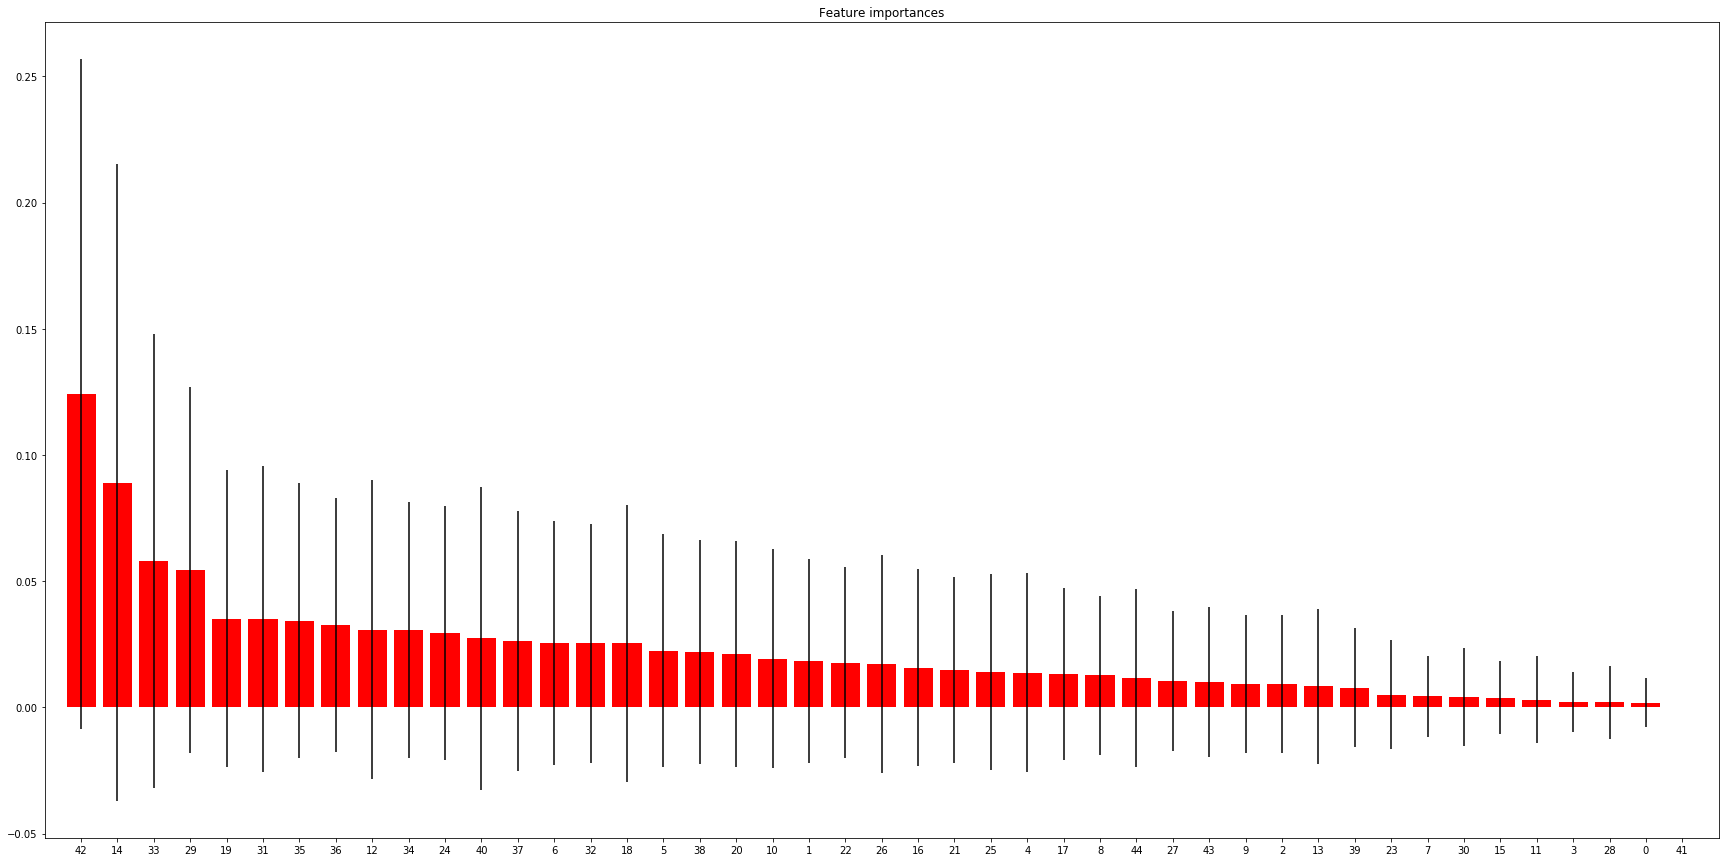

In [72]:
X_train_hla, X_test_hla, y_train_hla, y_test_hla = train_test_split(HLA_data, labels_ILD, test_size = 0.2, random_state=1)
forest, y_pred, acc = RandomForest(X_train_hla, X_test_hla, y_train_hla, y_test_hla, n_estimators = 100, criterion = 'entropy', random_state=2)
cm = make_cm(y_test_hla,y_pred, ["ILD-", "ILD+"])
top_features= forest_top_n_features(forest, X_test_hla, y_test_hla, 5, all_data)
for a,b in top_features:
    print(a, ":", b)
print("The accuracy of this random forest classifier is: ", acc)

graph_forest_importances(forest, X_train_hla, (30,15))

## Just TCR to predict ILD

In [74]:
all_data = read_data("HLA_V_ILD.xlsx","Sheet2" )
labels = all_data[all_data.columns[0]]
tcr_data = all_data.drop(all_data.columns[0], axis = 1)
print(tcr_data.shape)
tcr_data.head()

(49, 55)


,TRBV1-1,TRBV2-1,TRBV3-1,TRBV4-1,TRBV4-2,TRBV4-3,TRBV5-1,TRBV5-3,TRBV5-4,TRBV5-5,...,TRBV19-1,TRBV20-1,TRBV21-1,TRBV23-1,TRBV24-1,TRBV25-1,TRBV27-1,TRBV28-1,TRBV29-1,TRBV30-1
0,0.00,2.61,4.78,1.96,1.52,0.65,5.22,0.00,1.74,0.87,...,6.74,9.35,1.30,0.43,2.17,1.30,6.30,2.83,1.96,4.13
1,0.06,5.68,2.22,1.05,1.42,2.72,6.05,0.12,1.30,0.68,...,9.88,8.21,0.74,0.12,0.43,0.62,2.53,4.14,1.42,1.42
2,0.00,10.42,3.75,2.92,2.08,0.00,8.33,0.42,1.25,0.83,...,7.08,3.75,0.00,0.83,0.42,1.25,2.50,2.92,2.08,1.25
3,0.44,6.32,4.56,2.79,0.74,2.06,6.18,0.29,2.79,1.32,...,3.09,10.15,1.62,0.15,0.74,0.74,1.91,2.06,1.62,2.35
4,0.00,6.50,5.00,4.50,2.00,0.00,7.75,0.00,2.00,0.75,...,8.00,6.75,0.25,0.00,0.75,2.00,3.25,0.25,3.25,3.25


fold:  1
0.5
TRBV5-7 : 0.10723463449583108
TRBV20-1 : 0.04098327658683194
TRBV10-2 : 0.039047152174691305
TRBV7-9 : 0.036768654304502164
TRBV6-5 : 0.035946085419502796
The accuracy of this random forest classifier is:  0.5 

fold:  2
0.6
TRBV5-7 : 0.13443223893780865
TRBV20-1 : 0.03641208810726101
TRBV7-5 : 0.035484961750415996
ILD_Status : 0.029592995154163085
TRBV23-1 : 0.029441615530159535
The accuracy of this random forest classifier is:  0.6 

fold:  3
0.9
TRBV5-7 : 0.07801091446890471
TRBV7-5 : 0.03806338477675208
TRBV25-1 : 0.03789639097348938
TRBV19-1 : 0.03650103111851884
TRBV7-9 : 0.035755456158672455
The accuracy of this random forest classifier is:  0.9 

fold:  4
0.6
TRBV5-7 : 0.15451949438037269
TRBV25-1 : 0.06408208667319751
TRBV1-1 : 0.0369610226800845
TRBV20-1 : 0.030340851969250623
TRBV5-5 : 0.02934975425017044
The accuracy of this random forest classifier is:  0.6 

fold:  5
0.6666666666666666
TRBV5-7 : 0.0745501639264636
TRBV25-1 : 0.06730675406253175
TRBV10-2 : 0.0

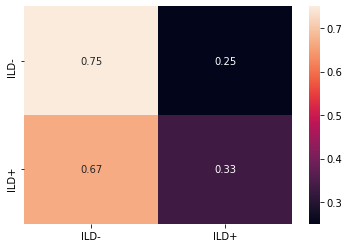

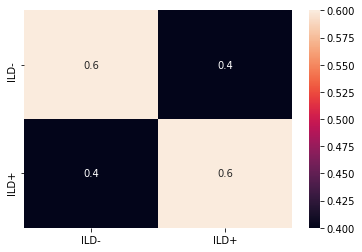

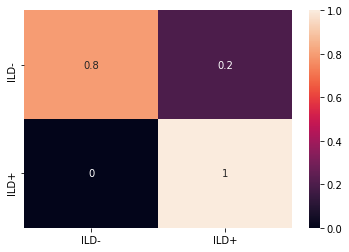

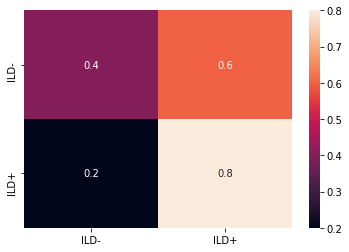

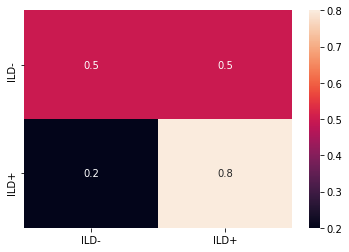

In [76]:
splits = 5
skf = StratifiedKFold(n_splits= splits, shuffle = True, random_state = 90)
tcr_data_strat = tcr_data.to_numpy()
avg_accuracy = 0
count = 1
for train_index_strat, test_index_strat in skf.split(tcr_data, labels_ILD):
    #print("TRAIN:", train_index_strat, "\nTEST:", test_index_strat)
    print("fold: ", count)
    count += 1
    X_train_strat, X_test_strat = tcr_data_strat[train_index_strat], tcr_data_strat[test_index_strat]
    y_train_strat, y_test_strat = labels_ILD[train_index_strat], labels_ILD[test_index_strat]
    forest, y_pred_strat, acc = RandomForest(X_train_strat,X_test_strat, y_train_strat, y_test_strat, n_estimators = 200, criterion = 'entropy', random_state=2)

    cm = make_cm(y_test_strat,y_pred_strat, ["ILD-", "ILD+"])
   
    top_features= forest_top_n_features(forest, X_test_strat, y_test_strat, 5, all_data)
    print(acc)
    avg_accuracy += acc
    for a,b in top_features:
        print(a, ":", b)
    std2 = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    print("The accuracy of this random forest classifier is: ", acc, "\n")
print("Overall accuracy is: {}".format(avg_accuracy/splits))

TRBV5-7 : 0.08007416941201624
TRBV27-1 : 0.046002453749075724
TRBV7-2 : 0.03835687802387455
TRBV3-1 : 0.0371833502080331
TRBV20-1 : 0.03695812649933121
The accuracy of this random forest classifier is:  0.8


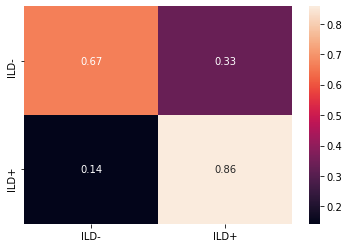

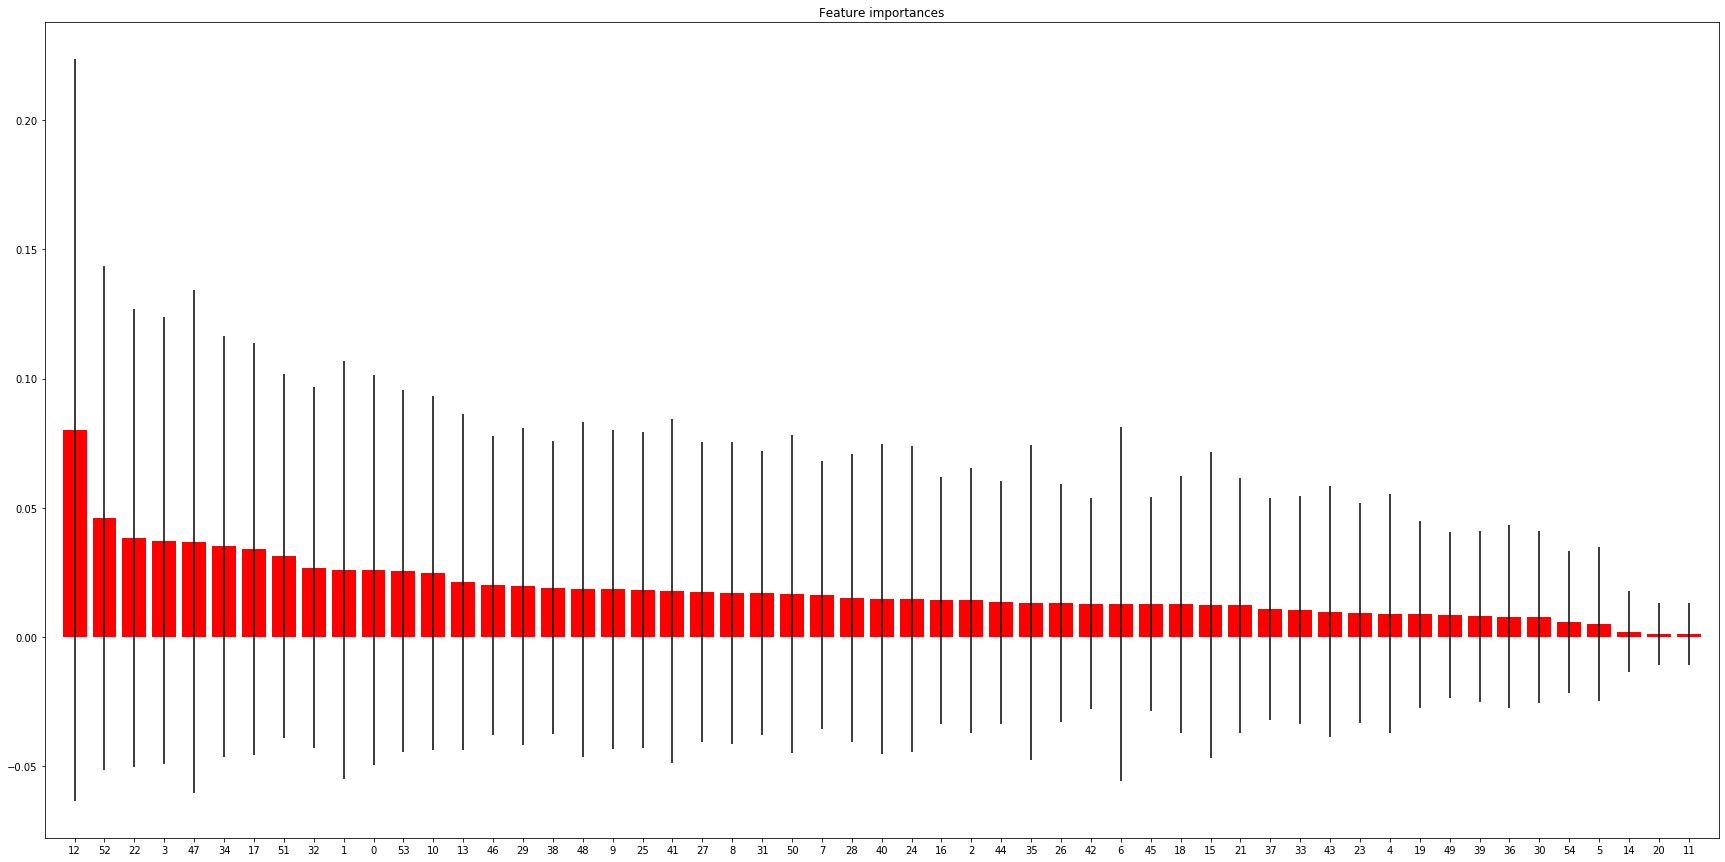

In [78]:
X_train_tcr, X_test_tcr, y_train_tcr, y_test_tcr = train_test_split(tcr_data, labels_ILD, test_size = 0.2, random_state=2)
forest, y_pred_tcr, acc = RandomForest(X_train_tcr, X_test_tcr, y_train_tcr, y_test_tcr, n_estimators = 100, criterion = 'entropy', random_state=2)
cm = make_cm(y_test_tcr,y_pred_tcr, ["ILD-", "ILD+"])
top_features= forest_top_n_features(forest, X_test_tcr, y_test_tcr, 5, all_data)
for a,b in top_features:
    print(a, ":", b)
print("The accuracy of this random forest classifier is: ", acc)

graph_forest_importances(forest, X_train_tcr, (30,15))